In [1]:
import numpy as np
import pymc3 as pm 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def lda_model(data,ndocs,ntopics,nvocab):
    # Define model 
    with pm.Model() as model:
        alpha = np.ones([ndocs, ntopics])
        beta = np.ones([ntopics, nvocab])
        length_docs = [len(doc) for doc in data]

        # topic distribution for each document 
        theta = pm.distributions.Dirichlet('theta', 
                                           a=alpha, 
                                           shape=(ndocs, ntopics))
        # word distribution for each topic 
        phi = pm.distributions.Dirichlet('phi', 
                                         a=beta, 
                                         shape=(ntopics, nvocab))
        # topic for each word in doc d
        zs = [pm.Categorical("z_d{}".format(d), 
                             p=theta[d], 
                             shape=length_docs[d]) 
                    for d in range(ndocs)]
        # word distribution associated to topic k
        ws = [pm.Categorical("w_{}_{}".format(d,i), 
                             p=phi[zs[d][i]], 
                             observed=data[d][i]) 
                    for d in range(ndocs) for i in range(length_docs[d])]
        step = pm.NUTS()
        trace = pm.sample(1000,step=step)
    return trace 

In [14]:
def plot_data(data):
    plt.clf()
    plt.matshow(data, fignum=1000, cmap=plt.cm.Blues)
    plt.gca().set_aspect('auto')
    plt.xlabel("Words")
    plt.ylabel("Documents")
    

def plot_words_per_topic(trace,ndocs):
    plt.clf()
    fig, ax = plt.subplots(1,1)
    words = [] 
    for d in range(ndocs):
        value_z=trace.get_values("z_d{}".format(d))
        words.append(value_z[-1])
    topic_dist = dict()
    for k_i in words:
        for k in k_i:
            if k not in topic_dist:
                topic_dist[k] = 0
            topic_dist[k] += 1
    ax.bar(topic_dist.keys(), topic_dist.values())
    ax.set_xlabel("Topics")
    ax.set_ylabel("Counts")
    ax.set_title("Document words per topics")
    plt.show()    
    
def plot_word_dist(trace,nvocab):
    topics = trace.get_values('phi')
    topics = topics[-1,:] 
    plt.clf()
    t,n = topics.shape
    fig, ax = plt.subplots(int((t+1)/2),2,figsize=(10,10))
    for i in range(t):
        ax[int(i/2)][(i%2)].bar(range(nvocab),topics[i,:])
        ax[int(i/2)][(i%2)].set_title("Topic %s" % i)
    plt.suptitle("Words proportions per topic")
    fig.subplots_adjust(hspace=0.5, wspace=0.5)    

# With Generated data 

Assigned CategoricalGibbsMetropolis to z_d0
Assigned CategoricalGibbsMetropolis to z_d1
Assigned CategoricalGibbsMetropolis to z_d2
Assigned CategoricalGibbsMetropolis to z_d3
Assigned CategoricalGibbsMetropolis to z_d4
Assigned CategoricalGibbsMetropolis to z_d5
Assigned CategoricalGibbsMetropolis to z_d6
Assigned CategoricalGibbsMetropolis to z_d7
Assigned CategoricalGibbsMetropolis to z_d8
Assigned CategoricalGibbsMetropolis to z_d9
Assigned CategoricalGibbsMetropolis to z_d10
Assigned CategoricalGibbsMetropolis to z_d11
Assigned CategoricalGibbsMetropolis to z_d12
Assigned CategoricalGibbsMetropolis to z_d13
Assigned CategoricalGibbsMetropolis to z_d14
Assigned CategoricalGibbsMetropolis to z_d15
Assigned CategoricalGibbsMetropolis to z_d16
Assigned CategoricalGibbsMetropolis to z_d17
Assigned CategoricalGibbsMetropolis to z_d18
Assigned CategoricalGibbsMetropolis to z_d19
100%|██████████| 1500/1500 [10:16<00:00,  2.43it/s]


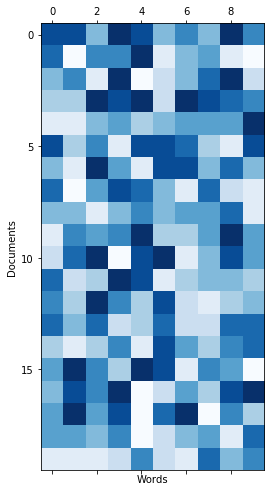

In [20]:
# number of topics,words,documents 
ntopics,nwords,ndocs = 5,10,20
data = np.random.randint(0,10,size=(ndocs,nwords))
plot_data(data)
trace=lda_model(data,ndocs,ntopics,nwords)

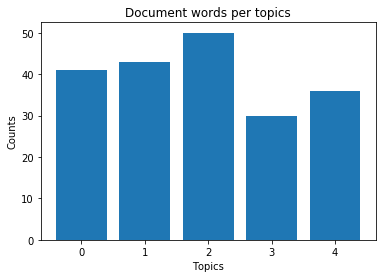

In [21]:
plot_words_per_topic(trace,ndocs)

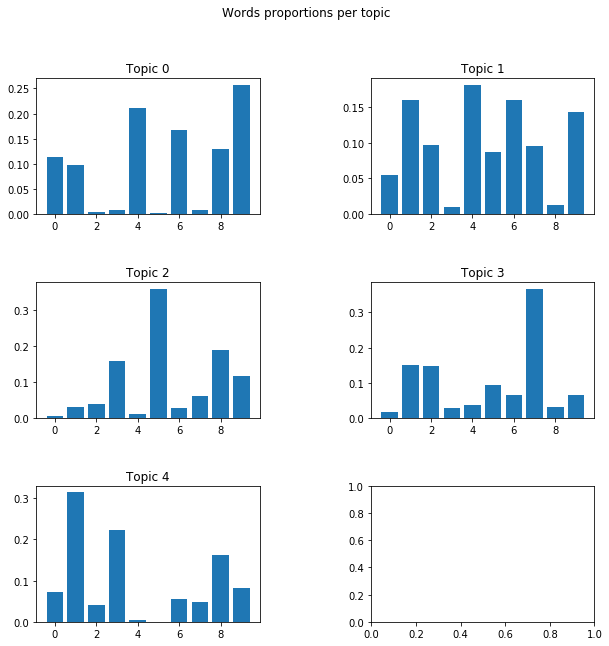

In [23]:
plot_word_dist(trace,nwords)